В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

In [305]:
import numpy as np
import pandas as pd 
import scipy.stats 
import seaborn as sns
import matplotlib.pyplot as plt  

1. Сгенерируйте данные.

In [306]:
from sklearn.datasets import make_classification

x_data_generated, y_data_generated = make_classification(scale=1)

In [307]:
x_data_generated

array([[ 0.10651268,  0.90542406, -0.08888789, ..., -0.48739258,
        -0.15484815,  0.72481589],
       [ 0.95718488,  0.13528961, -0.05699747, ...,  1.81955034,
         0.51071197,  0.45063924],
       [-1.46884165,  0.66705412,  1.31065166, ...,  0.78392608,
         0.12825836, -0.21103838],
       ...,
       [-0.40839002,  0.42666986,  0.83513054, ..., -0.31528776,
         0.85110022,  1.03099646],
       [ 0.15246207, -0.59958058, -2.22385496, ...,  0.56253631,
         0.00386575, -1.86322802],
       [ 1.42033695, -0.19297459,  0.51978573, ...,  0.15745136,
        -1.38190897,  2.49967368]])

In [308]:
y_data_generated

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

2. Постройте модель логистической регрессии и оцените среднюю точность.

In [309]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data_generated, y_data_generated, test_size=0.2, random_state=42)

In [310]:
from sklearn.linear_model import LogisticRegression

In [311]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [312]:
from sklearn.metrics import accuracy_score

model.score(X_test, y_test) 

0.85

3. Используйте статистические методы для отбора признаков:
* Выберите признаки на основе матрицы корреляции.
* Отсеките низковариативные признаки (VarianceThreshold).
* Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [313]:
data = pd.DataFrame(x_data_generated, columns=[f'feature_{i}' for i in range(x_data_generated.shape[1])])
data['target'] = y_data_generated
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,0.106513,0.905424,-0.088888,-1.541855,-1.996719,0.189248,0.222779,0.230187,0.355741,-1.189270,...,-0.561724,0.072300,-0.584833,0.253468,1.882366,-0.058128,-0.487393,-0.154848,0.724816,1
1,0.957185,0.135290,-0.056997,-0.324824,-1.888539,-0.785750,0.120517,-1.250549,-0.181594,-0.867499,...,0.555684,0.025647,-0.471056,0.953610,-0.136195,-0.162321,1.819550,0.510712,0.450639,1
2,-1.468842,0.667054,1.310652,0.058613,1.928651,-0.719870,-0.077725,-1.116585,-0.284064,0.254702,...,1.360987,-0.068405,0.093472,0.017187,1.202545,-0.154333,0.783926,0.128258,-0.211038,0
3,-1.025829,0.286771,-2.111879,-0.158744,0.309399,0.222998,-0.940536,-0.998575,-1.708788,-1.097403,...,-0.505282,-0.941206,-1.753196,2.007824,-1.618220,-0.779647,0.372292,-0.841279,-1.462236,0
4,-1.251656,-0.138384,0.748337,0.984749,-1.897444,-1.198824,0.511386,-0.733727,0.085569,-1.654311,...,-0.964911,1.365346,-0.600174,-0.809417,-0.178430,0.631069,0.009814,0.521008,1.382895,1


In [314]:
corr_matrix = data.corr()

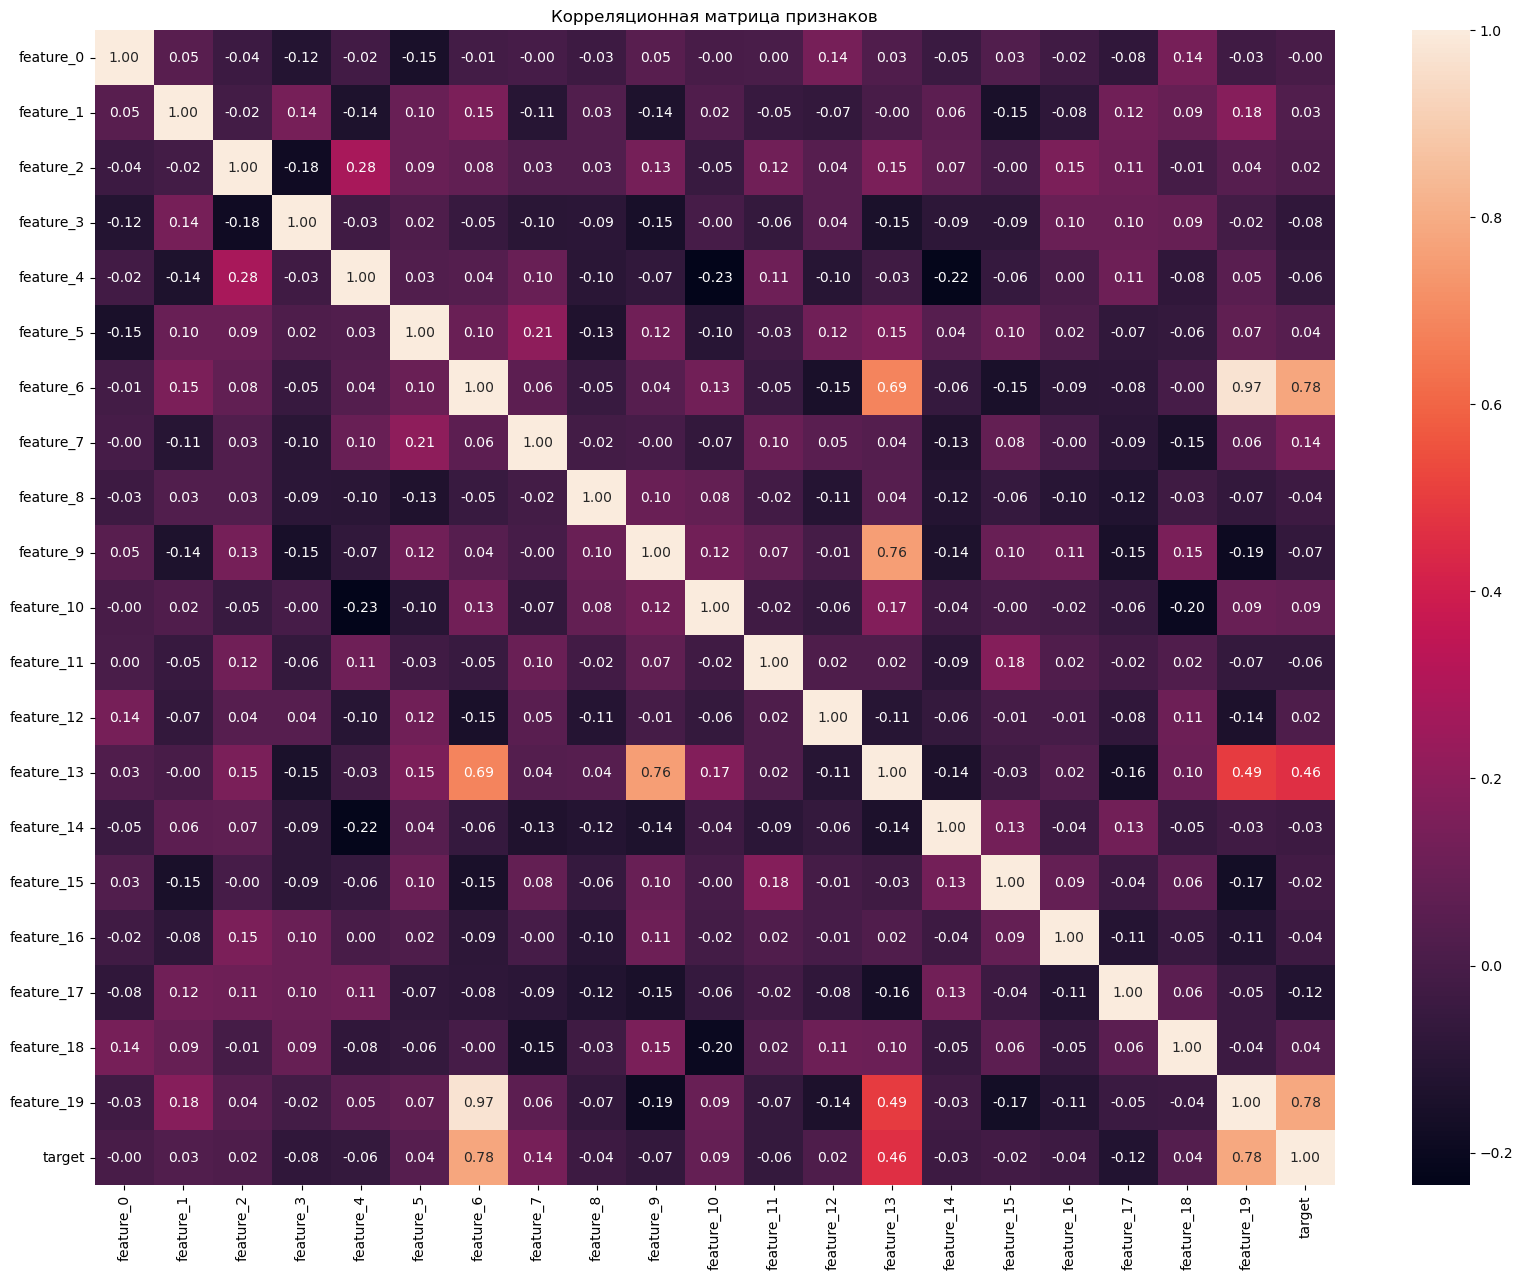

In [315]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Корреляционная матрица признаков')
plt.show()

In [316]:
# Выберем признаки на основе матрицы корреляции
data_corr = data.corr()['target'].drop('target')
high_corr_target = data_corr[data_corr.abs() > 0.5]
high_corr_target

feature_6     0.781010
feature_19    0.783009
Name: target, dtype: float64

In [317]:
# Выводим список признаков
high_corr_features = high_corr_target.index.tolist()
high_corr_features

['feature_6', 'feature_19']

In [318]:
features_corr = len(high_corr_features)
features_corr

2

In [319]:
X = data[high_corr_features]
y = data['target']

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

score_corr = model.score(X_test, y_test) 
score_corr

0.8

In [321]:
# Оценим дисперсию каждого признака
dispersions = np.var(x_data_generated, axis=0)
for i, var in enumerate(dispersions):
    print(f'{i}: дисперсия = {var:.3f}')

0: дисперсия = 1.058
1: дисперсия = 0.931
2: дисперсия = 0.865
3: дисперсия = 1.059
4: дисперсия = 1.013
5: дисперсия = 0.992
6: дисперсия = 0.587
7: дисперсия = 0.744
8: дисперсия = 1.002
9: дисперсия = 1.720
10: дисперсия = 1.235
11: дисперсия = 1.034
12: дисперсия = 1.386
13: дисперсия = 1.542
14: дисперсия = 0.916
15: дисперсия = 1.098
16: дисперсия = 0.970
17: дисперсия = 0.928
18: дисперсия = 0.836
19: дисперсия = 2.106


In [322]:
# Уберем низковариативные признаки с помощью VarianceThreshold (порог не ниже 0.9)
from sklearn.feature_selection import VarianceThreshold

# Удаляем целевую переменную из данных
data_ = data.drop(columns='target')

feature_names = data_.columns
selector = VarianceThreshold(threshold=0.9)
x_data_reduced = selector.fit_transform(data_)
mask = selector.get_support()

# Выводим список признаков
selected_feature_names = feature_names[mask]
selected_feature_names

Index(['feature_0', 'feature_1', 'feature_3', 'feature_4', 'feature_5',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
       'feature_19'],
      dtype='object')

In [323]:
features_variance = len(selected_feature_names)
features_variance

16

In [324]:
X = data[selected_feature_names]
y = data['target']

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

score_variance = model.score(X_test, y_test) 
score_variance

0.8

4. Осуществите отбор признаков на основе дисперсионного анализа:
* Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).
* Повторите п. 2 на отобранных признаках.

In [326]:
# Выбор 5 лучших признаков с помощью f_classif 
from sklearn.feature_selection import SelectKBest, f_classif

feature_names = data.drop(columns='target').columns
selector = SelectKBest(f_classif, k=5)
x_data_reduced = selector.fit_transform(data.drop(columns='target'), data['target'])
mask = selector.get_support()

# Cписок оставшихся признаков
selected_feature_names = feature_names[mask]
selected_feature_names

Index(['feature_6', 'feature_7', 'feature_13', 'feature_17', 'feature_19'], dtype='object')

In [327]:
# Количество признаков по отбору
features_classif = len(selected_feature_names)
features_classif

5

In [328]:
X = data[selected_feature_names]
y = data['target']

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

score_classif = model.score(X_test, y_test) 
score_classif

0.85

5. Отбор с использованием моделей:
* Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в 
* Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.
* Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [330]:
# Делим данные на train, test
X_train, X_test, y_train, y_test = train_test_split(x_data_generated, y_data_generated, test_size=0.2, random_state=42)

In [331]:
# Отбор признаков с помощью логистической регрессии
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Коэффициенты
coef_abs = np.abs(model.coef_[0])

# 5 лучших
k = 5
top_indices = np.argsort(coef_abs)[-k:]

X_train_lr = X_train[:, top_indices]
X_test_lr = X_test[:, top_indices]

selected_feature_names = feature_names[top_indices]
selected_feature_names

Index(['feature_9', 'feature_7', 'feature_13', 'feature_6', 'feature_19'], dtype='object')

In [332]:
features_lr = len(selected_feature_names)
features_lr

5

In [333]:
X_train_data = pd.DataFrame(X_train_lr, columns=selected_feature_names)
X_test_data = pd.DataFrame(X_test_lr, columns=selected_feature_names)

model_selected = LogisticRegression(random_state=42)
model_selected.fit(X_train_data, y_train)

score_lr = model_selected.score(X_test_data, y_test)
score_lr

0.85

In [334]:
# Отбор признаков с помощью RandomForest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

k = 5
top_indices_rf = np.argsort(importances)[-k:]

X_train_rf = X_train[:, top_indices_rf]
X_test_rf = X_test[:, top_indices_rf]

selected_feature_names = feature_names[top_indices_rf]
selected_feature_names

Index(['feature_10', 'feature_5', 'feature_13', 'feature_6', 'feature_19'], dtype='object')

In [335]:
features_rf = len(selected_feature_names)
features_rf

5

In [336]:
X_train_data = pd.DataFrame(X_train_rf, columns=selected_feature_names)
X_test_data = pd.DataFrame(X_test_rf, columns=selected_feature_names)

model_selected = RandomForestClassifier(random_state=42)
model_selected.fit(X_train_data, y_train)

score_rf = model_selected.score(X_test_data, y_test)
score_rf

0.85

6. Перебор признаков:
* SequentialFeatureSelector.
* Повторите п. 2 на отобранных признаках.

In [337]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(
    LogisticRegression(random_state=42),
    n_features_to_select=5,
    direction='forward'
)

sfs.fit(X_train, y_train)

selected_mask = sfs.get_support()
selected_indices = np.where(selected_mask)[0]
selected_feature_names = feature_names[selected_indices]
selected_feature_names

Index(['feature_2', 'feature_5', 'feature_6', 'feature_12', 'feature_19'], dtype='object')

In [338]:
features_selector = len(selected_feature_names)
features_selector

5

In [339]:
X = data[selected_feature_names]
y = data['target']

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

score_selector = model.score(X_test, y_test)
score_selector

0.85

7. Сформулируйте выводы по проделанной работе:
* Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [341]:
data = {'Отбор признаков': 
        ['Матрица корреляции', 'VarianceThreshold', 'f_classif', 'LogisticRegression', 'RandomForest', 'SequentialFeatureSelector'],
        'Количество признаков': 
        [features_corr, features_variance, features_classif, features_lr, features_rf, features_selector],
        'Точность модели': 
        [score_corr, score_variance, score_classif, score_lr, score_rf, score_selector]}

In [342]:
# В зависимости от сгенерированныъ данных результаты разнятся в зависимости от выбора метода отбора
df = pd.DataFrame(data)
df

,Отбор признаков,Количество признаков,Точность модели
0,Матрица корреляции,2,0.80
1,VarianceThreshold,16,0.80
2,f_classif,5,0.85
3,LogisticRegression,5,0.85
4,RandomForest,5,0.85
5,SequentialFeatureSelector,5,0.85
